In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

(840, 1280, 3)


<IPython.core.display.Javascript object>


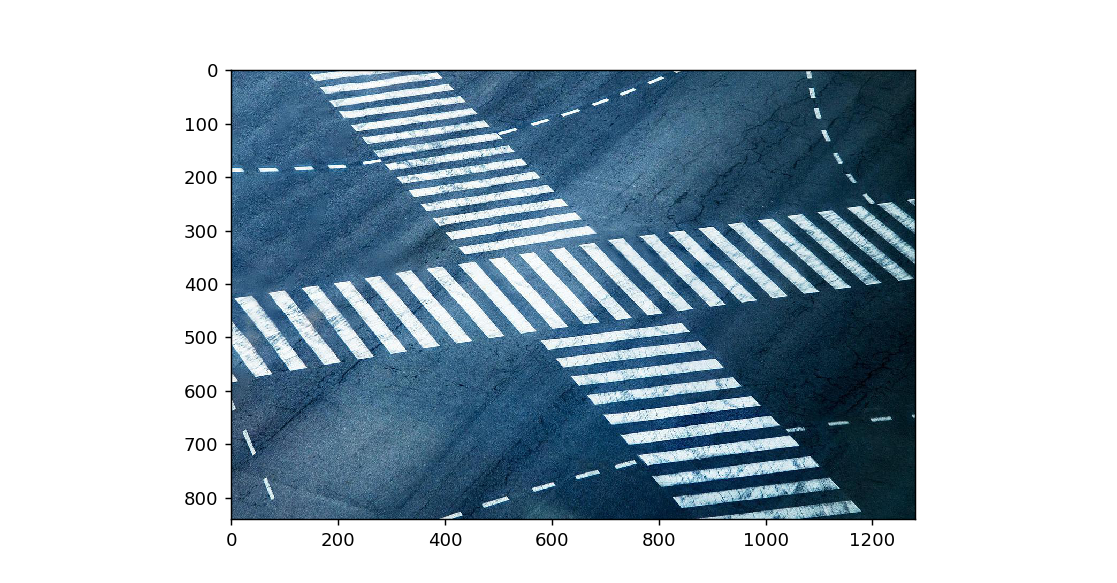

In [3]:
im = imread('crossing.jpg')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

uint8


<IPython.core.display.Javascript object>


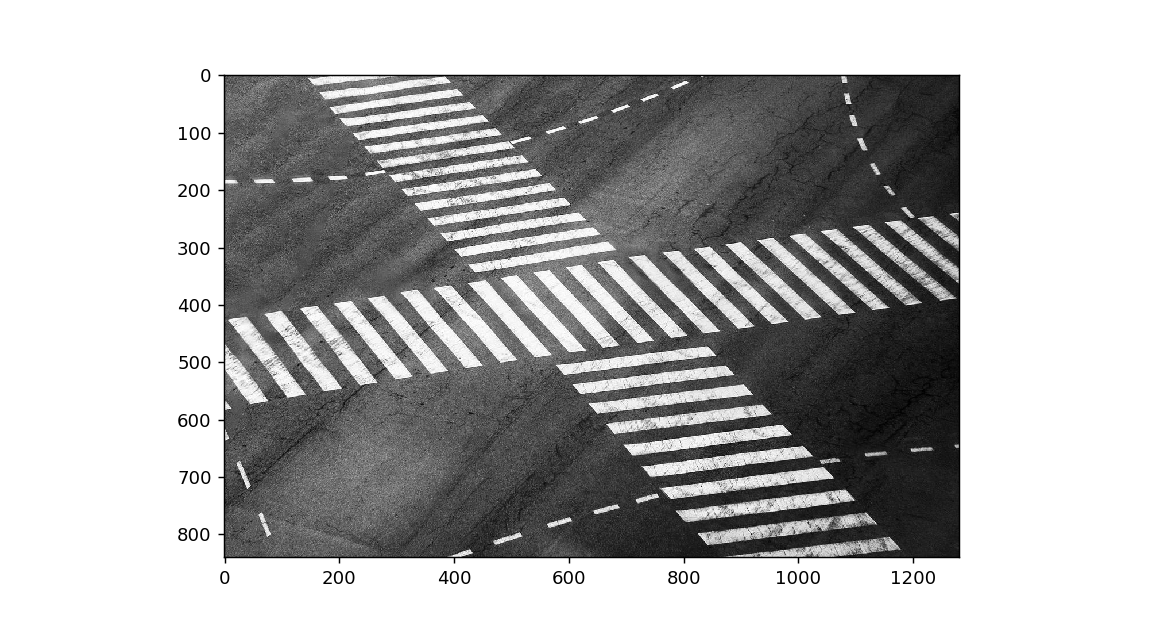

In [4]:
from skimage.color import rgb2gray

imgray = (rgb2gray(im)*255).astype('uint8')
print(imgray.dtype)
plt.figure()
plt.imshow(imgray, cmap=plt.cm.gray)
plt.show()

In [25]:
from skimage.feature import greycomatrix,greycoprops

def get_descriptors(region, angles, displacements, props):
    glcm = greycomatrix(region, displacements, angles, 256, normed=True, symmetric=True)
    descriptors = []
    for prop in props:
        descriptors += [greycoprops(glcm, prop)]
    return np.array(descriptors).flatten()

angles = [0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6]
displacements = [20]
props = ['dissimilarity']

n_cells_x = 40
n_cells_y = 20
size_x = im.shape[1]//n_cells_x
size_y = im.shape[0]//n_cells_y

descriptors = np.zeros((n_cells_y,n_cells_x,len(angles)*len(displacements)*len(props)))
for y in range(n_cells_y):
    for x in range(n_cells_x):
        descriptors[y,x] = get_descriptors(imgray[y*size_y:(y+1)*size_y,x*size_x:(x+1)*size_x],angles,displacements,props)

ndescriptors = (descriptors-descriptors.mean(axis=(0,1)))/descriptors.std(axis=(0,1))

<IPython.core.display.Javascript object>


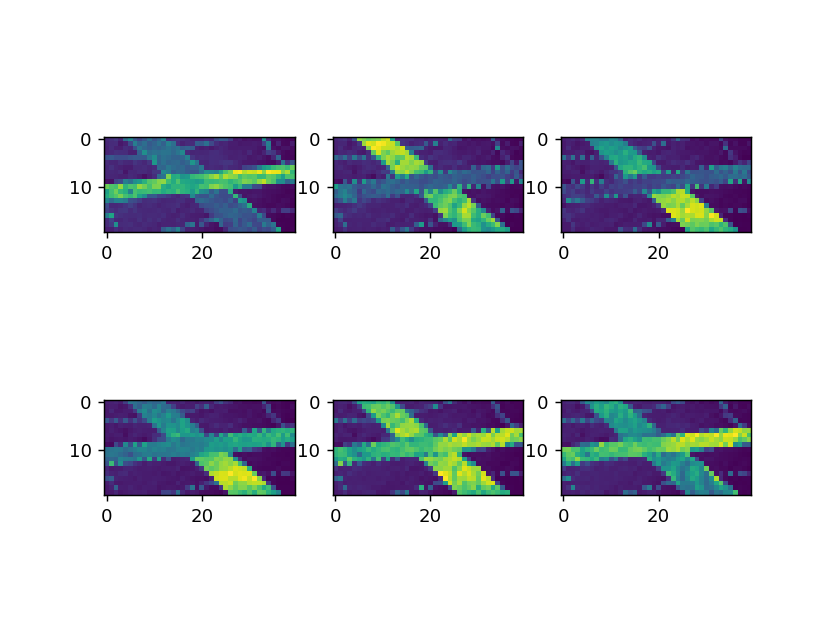

In [26]:
plt.figure()
for i in range(ndescriptors.shape[2]):
    plt.subplot(ndescriptors.shape[2]/3,3,i+1)
    plt.imshow(ndescriptors[:,:,i])
plt.show()

In [27]:
from skimage.transform import resize

overlay = resize(ndescriptors.sum(axis=2), im.shape[:2], order=0)

plt.figure()
plt.imshow(im)
plt.imshow(overlay,alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>

1.0144750162745901


<IPython.core.display.Javascript object>


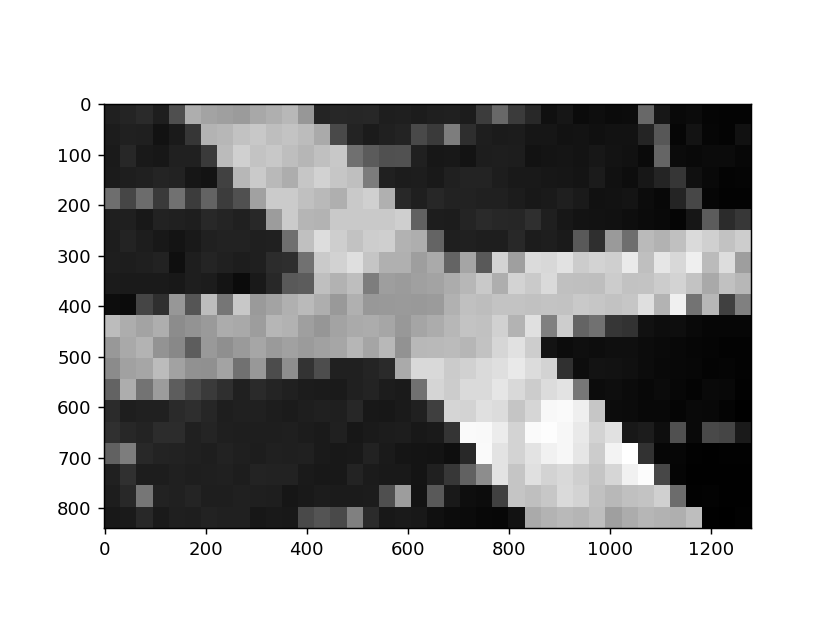

<IPython.core.display.Javascript object>


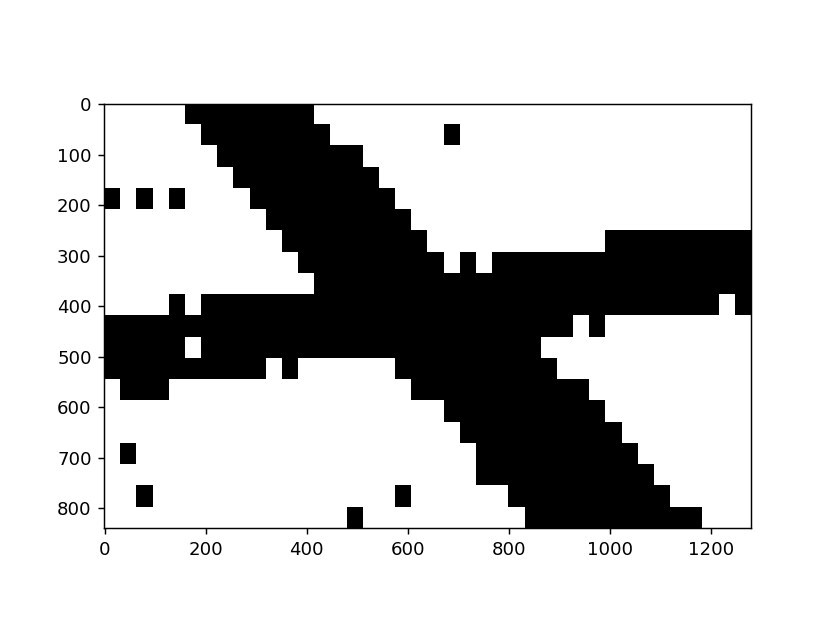

In [28]:
from skimage.filters import threshold_otsu

t = threshold_otsu(overlay)
print(t)

plt.figure()
plt.imshow(overlay, cmap=plt.cm.gray)
plt.figure()
plt.imshow(overlay<t, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


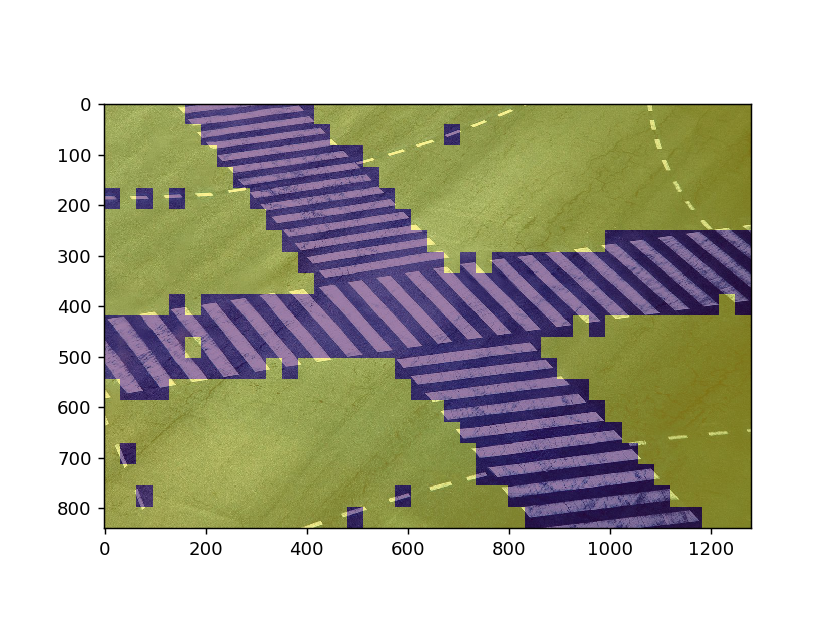

In [29]:
mask = overlay<t

plt.figure()
plt.imshow(im)
plt.imshow(mask,alpha=0.5)
plt.show()

In [30]:
size_x = 64
size_y = 84
step_x = 32
step_y = 42

ys = np.arange(0,im.shape[0]-size_y+1,step_y)
xs = np.arange(0,im.shape[1]-size_x+1,step_x)

descriptors = np.zeros((len(ys),len(xs),len(angles)*len(displacements)*len(props)))
for idy,y in enumerate(ys):
    for idx,x in enumerate(xs):
        descriptors[idy,idx] = get_descriptors(imgray[y:y+size_y,x:x+size_x],angles,displacements,props)

In [37]:
overlay = resize(descriptors.sum(axis=2), im.shape[:2], order=1, mode='constant')

plt.figure()
plt.imshow(im)
plt.imshow(overlay,alpha=0.5)
plt.show()

t = threshold_otsu(overlay)
mask = resize(overlay<t, im.shape[:2], order=0)

plt.figure()
plt.imshow(im)
plt.imshow(mask,alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>